# Amazon Prime video cvt prediction
Using the position where video located and movie characteristics to predict such movies cumulated view time per day. This helps Amazon quote ads for movies in different genres and locations. Also help them optimize their prime video movie push algorithm.

## Load packages, load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TVdata.txt to TVdata.txt


In [3]:
TV=pd.read_table('TVdata.txt',header=0,sep=',',lineterminator='\n')
TV.head(5)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


# Part 1: Data Exploration

## 1.1 Delete or dicover erroneous data

Find out if there is duplicated video or same video id

In [12]:
if TV['video_id'].duplicated().sum()==0:
  print('no duplicated index')

no duplicated index


## 1.2 Numerical Features





###1.2.1 Overview

In [13]:
TV.drop(columns=['video_id','release_year'],axis=1).describe(percentiles=[0.1,0.25,0.5,0.75,0.95])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,4218.630239,7.782537,28.103644,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,13036.079964,6.134183,11.863649,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,2.187625,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
10%,141.984913,3.000000,13.000000,8.000000,0.000000e+00,0.000000e+00,2.300000,62.390781,0.000000,0.000000
25%,351.168776,4.000000,20.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,1193.499989,6.000000,28.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,3356.788816,9.000000,36.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
95%,14692.833929,22.000000,48.000000,26199.500000,1.200000e+07,8.551228e+06,7.800000,119.131183,65.000000,2.597222
max,307127.605608,41.000000,70.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [14]:
(TV==0).sum(axis=0)

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64

### 1.2.2 Y feature,cvt_per_day

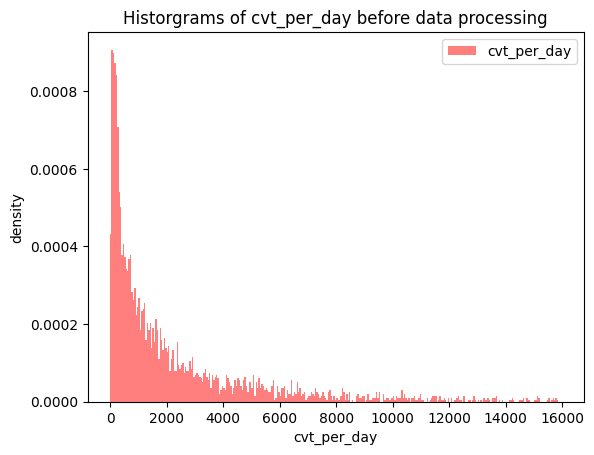

In [15]:
plt.hist(TV['cvt_per_day'],bins=range(0,16000,50),color='r',label='cvt_per_day',density=True,alpha=0.5)
plt.title('Historgrams of cvt_per_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

### 1.2.3 Correlations: among numerical features

<Axes: >

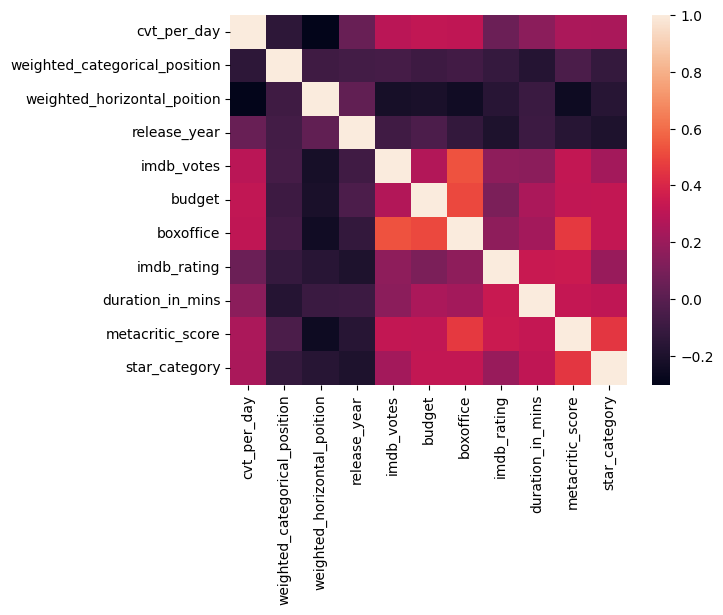

In [16]:
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating',
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
sns.heatmap(corr)

In [17]:
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110
metacritic_score,0.249159,-0.044317,-0.255015,-0.167038,0.321860,0.314608,0.464965,0.346935,0.327050,1.000000,0.452445


## 1.3 Categorical features

### 1.3.1 Distribution of categorical features

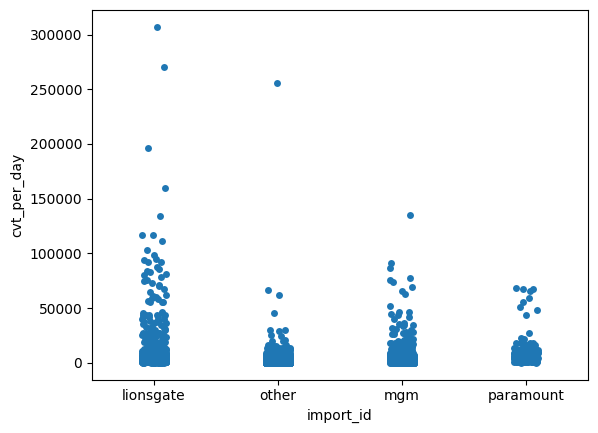

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


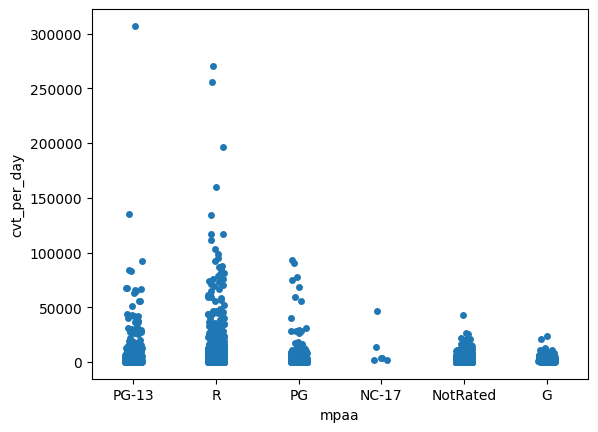

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


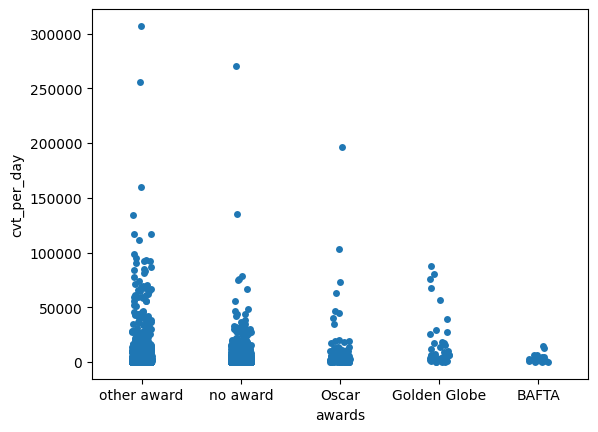

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [18]:
sns.stripplot(x='import_id', y='cvt_per_day', data=TV,jitter=True)
plt.show()
print(TV['import_id'].value_counts())

sns.stripplot(x='mpaa', y='cvt_per_day', data=TV,jitter=True)
plt.show()
print(TV['mpaa'].value_counts())

sns.stripplot(x='awards', y='cvt_per_day', data=TV, jitter=True)
plt.show()
print(TV['awards'].value_counts())

After very basic Exploratory Data Analysis, we have to do some data cleaning and data preprocessing. First, we need to encode the categorical feature.

### 1.3.2 Distribution of splited genres

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


<Axes: >

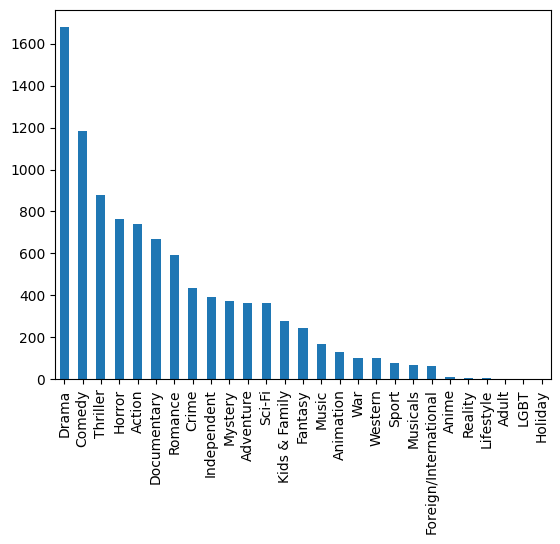

In [19]:
gen_split = TV['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending=False).plot.bar()

### 1.3.3 Distribution of release_year

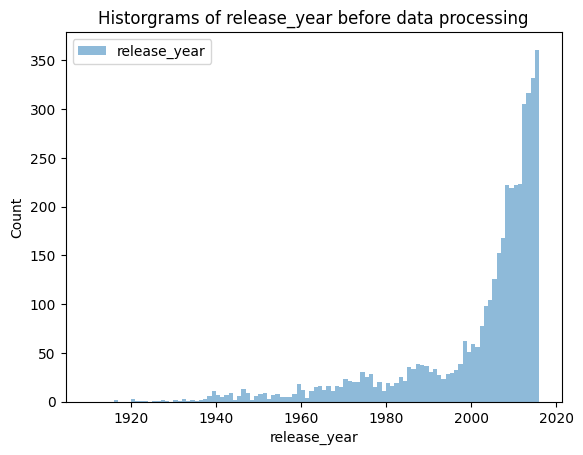

In [20]:
plt.hist(TV['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, label = 'release_year')
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()

The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

# Part 2: Feature Preprocessing

## 2.1 Categorical features

There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1

Also, a video may have more than one genre, in the feature preprocessing, all genres are handled individually.
The release_year should be binned into 10 buckets based on the year range between 1917 and 2017.

In [21]:
d_import_id = pd.get_dummies(TV['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

After observing the distribution of different genre, there are some genre type that only has few movies or video, for example Holiday, LGBT, Adult.ext

In [22]:
d_genres=TV['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [23]:
TV['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
Name: release_year, dtype: float64

Then make the bin

In [24]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']

year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [25]:
temp_tv=TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)

newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)

In [26]:
newTV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.605608,1,3,69614,15000000,42930462,6.5,112.301017,51,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,1,3,46705,15000000,3301046,6.5,94.983250,41,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,1,3,197596,26000000,37397291,7.3,115.763675,58,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.720996,3,4,356339,15000000,15700000,7.6,130.703583,94,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,1,3,46720,27220000,8551228,6.4,105.545533,37,...,0,0,0,0,0,0,0,1,0,0


## 2.2 Missing data

In [27]:
newTV.eq(0).sum()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                        3549
mgm                              3781
other                            1263
paramount                        4085
G                                4101
NC-17                            4220
NotRated                         2068
PG                               3873
PG-13                            3800
R                                3068
BAFTA                            4207
Golden Globe                     4182
Oscar                            4085
no award                         1657
other award                      2773
Action      

In [28]:
zero_columns = ['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']
newTV[zero_columns] = newTV[zero_columns].replace(0, np.nan)
newTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

In [29]:
newTV1=newTV.copy()
newTV1['boxoffice']=newTV1['boxoffice'].fillna(newTV1['boxoffice'].mean())
newTV1['metacritic_score']=newTV1['metacritic_score'].fillna(newTV1['metacritic_score'].mean())
newTV1['star_category']=newTV1['star_category'].fillna(newTV1['star_category'].mean())
newTV1['imdb_votes']=newTV1['imdb_votes'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_rating']=newTV1['imdb_rating'].fillna(newTV1['imdb_rating'].mean())
newTV1['budget']=newTV1['budget'].fillna(newTV1['budget'].mean())
newTV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

There are two most common used scaling method: normalization and standardscaler If there are no specific requirement for the range of output, we choose to use standardscaler

## 2.3 Feature scaling

In [30]:
import sklearn.preprocessing as preprocessing
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice',
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV1.copy() #optional code
sc_scale = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])
newTV_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.605608,-1.105826,-2.116264,1.984496,1.470049,4.695913,0.541892,1.078791,-0.629733,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,-1.105826,-2.116264,1.258002,1.470049,-1.022340,0.541892,0.257409,-1.997101,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,-1.105826,-2.116264,6.043083,3.108277,3.897514,1.099791,1.243025,0.327425,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.720996,-0.779746,-2.031963,11.077168,1.470049,0.766744,1.309003,1.951625,5.249951,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,-1.105826,-2.116264,1.258478,3.289972,-0.264775,0.472155,0.758378,-2.544049,...,0,0,0,0,0,0,0,1,0,0


# Part 3: Model Training

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(newTV_sc, test_size=0.15, random_state = 4)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

### 3.1 Lasso linear regression

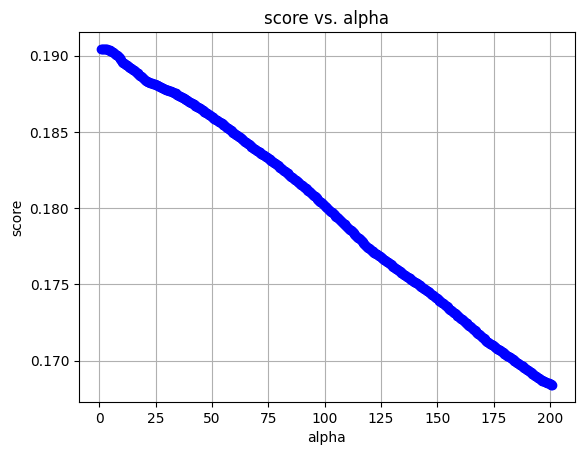

The optimaized alpha and score of Lasso linear is: 


(None, 1.4008016032064128, 0.19044043403947597)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score #not used
from math import sqrt

lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 4)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso #optional code
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score


In [33]:
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=1.4008016032064128)

## 3.2 Ridge linear regression

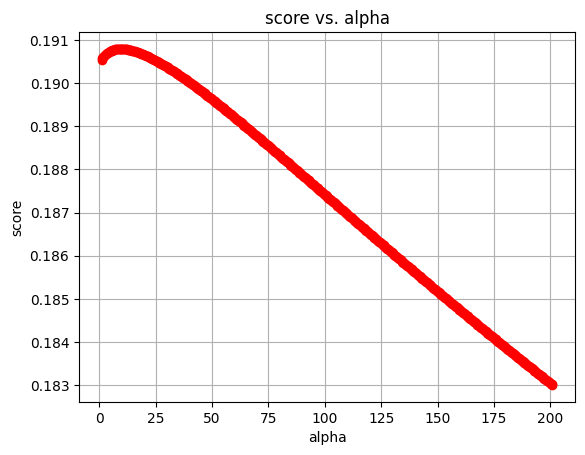

The optimaized alpha and score of Ridge linear is: 


(None, 9.41683366733467, 0.19079471451936725)

In [34]:
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 4)
alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge #optional code
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [35]:
ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

Ridge(alpha=9.41683366733467)

##3.3 Random Forest

My first set is max_depth=[1, 50, 100] n_estimators=[1,100, 200] max_depth is: 50 n_estimators is: 200

max_depth=[25, 50, 75] n_estimators=[100,200, 250]the best parameter for max_depth is: 50. the best parameter for n_estimators is: 200
max_depth=[25, 35, 45, 50, 75] n_estimators=[75, 100,125, 150, 175, 200, 225]the best parameter for max_depth is: 45. the best parameter for n_estimators is: 200
max_depth=[35,40, 42, 45, 47, 50], n_estimators=[180, 190, 195, 200, 205, 210, 215] the best parameter for max_depth is: 45. the best parameter for n_estimators is: 190
max_depth=[41,42, 43, 44, 45, 46, 47, 48]
n_estimators=[182,184,186,188,189,190,191,192,193,194]
the best parameter for max_depth is: 43
the best parameter for n_estimators is: 189



In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=4,max_features='sqrt')
param_grid={'n_estimators':[183,184,185,186,187,188,189,190,191,192,193],'max_depth':[40, 41,42, 43, 44, 45, 46]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
clf.fit(model_train_x,model_train_y)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=4),
             param_grid={'max_depth': [40, 41, 42, 43, 44, 45, 46],
                         'n_estimators': [183, 184, 185, 186, 187, 188, 189,
                                          190, 191, 192, 193]})

In [40]:
clf.cv_results_['mean_test_score']

array([0.53602774, 0.53644958, 0.53686143, 0.53771255, 0.53857414,
       0.5385794 , 0.53880421, 0.53844439, 0.53866272, 0.53829488,
       0.53789029, 0.5374812 , 0.53788255, 0.53822102, 0.53908652,
       0.53993689, 0.53962378, 0.53984918, 0.53949527, 0.53930321,
       0.5393151 , 0.5389105 , 0.53880811, 0.53919191, 0.53952861,
       0.54038069, 0.54123011, 0.54083574, 0.54105644, 0.54068957,
       0.54026273, 0.54035534, 0.53995787, 0.5388734 , 0.53925731,
       0.53959059, 0.54043483, 0.54128632, 0.5409787 , 0.54120181,
       0.54083362, 0.54040878, 0.54042795, 0.54002121, 0.53878443,
       0.53917029, 0.53950489, 0.54035045, 0.5412039 , 0.5409078 ,
       0.54112972, 0.54076665, 0.54034522, 0.54027213, 0.53986982,
       0.53879718, 0.53917935, 0.53951239, 0.54035705, 0.54121095,
       0.5409103 , 0.54113167, 0.54076786, 0.54034604, 0.54033023,
       0.53993144, 0.53852236, 0.53890758, 0.53924259, 0.54008944,
       0.54094353, 0.54067521, 0.5408971 , 0.54053513, 0.54011

{'mean_fit_time': array([1.20184584, 1.34872789, 1.21510715, 1.5880013 , 1.20056763,
       1.40592899, 1.21825552, 1.38969545, 1.20474329, 1.39751148,
       1.33162627, 1.25478134, 1.3482307 , 1.22244415, 1.37633667,
       1.20961809, 1.39176121, 1.22938061, 1.39501848, 1.20662179,
       1.40239878, 1.24575262, 1.36327095, 1.19895415, 1.34054494,
       1.58226266, 1.16145658, 1.38523965, 1.19983478, 1.43805251,
       1.22872381, 1.44113855, 1.22762079, 1.36210365, 1.16868353,
       1.35773358, 1.18189487, 1.36393223, 1.30586667, 1.31913714,
       1.41041298, 1.20887403, 1.42928076, 1.24112687, 1.36933746,
       1.16632752, 1.3792541 , 1.38987427, 1.39341269, 1.25955014,
       1.3336381 , 1.38085551, 1.26187725, 1.41506195, 1.22882323,
       1.3797123 , 1.18219299, 1.37692242, 1.17867508, 1.40101051,
       1.19382143, 1.42668285, 1.29701633, 1.35871534, 1.41968155,
       1.29892998, 1.37807298, 1.16123686, 1.38024702, 1.17688484,
       1.59445715, 1.18660235, 1.39334717, 1

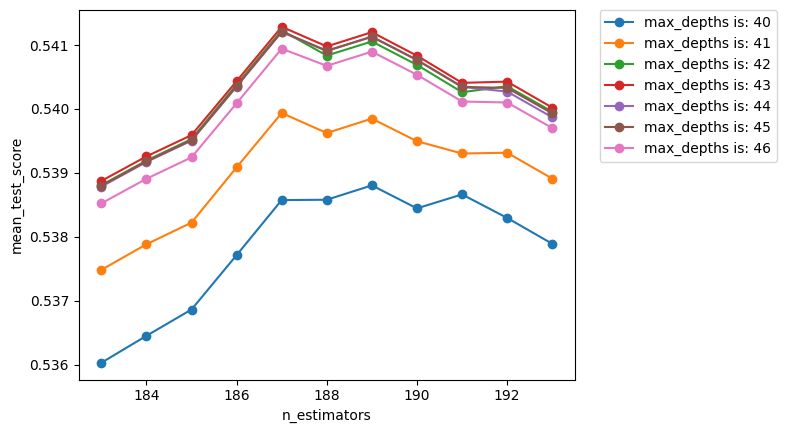

the best parameter for max_depth is: 43
the best parameter for n_estimators is: 187


In [46]:
result=clf.cv_results_
print(result)
max_depth= [40, 41,42, 43, 44, 45, 46]
n_estimators= [183,184,185,186,187,188,189,190,191,192,193]

scores = clf.cv_results_['mean_test_score'].reshape(len(max_depth), len(n_estimators))

plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
  plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))

# Part 4: Model Evaluation

## 4.1: Evaluate all models

In [47]:
train_x = model_train_x
train_y = model_train_y
test_x = model_test_x
test_y = model_test_y

#### Lasso

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error
lasso=Lasso(alpha=model1_para)
lasso.fit(train_x,train_y)
pred_y=lasso.predict(test_x)
lasso_score=lasso.score(test_x,test_y)
MSE_lasso=mean_squared_error(test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.17772747408526035
Mean square error of lasso:  80795605.15184617
Root mean squared error of lasso: 8988.637558153414


#### Ridge

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_squared_error
ridge=Ridge(alpha=model3_para)
ridge.fit(train_x,train_y)
pred_y=ridge.predict(test_x)
ridge_score=ridge.score(test_x,test_y)
MSE_ridge=mean_squared_error(test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.17969958152947807
Mean square error of ridge:  80601828.01670137
Root mean squared error of ridge: 8977.852082580854


#### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],max_features='sqrt',random_state=4,n_jobs=-1)
rf.fit(train_x,train_y)
pred_y=rf.predict(test_x)
rf_score=rf.score(test_x,test_y)
MSE_rf=mean_squared_error(test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5102189500203497
Mean square error of rf:  48125353.9159542
Root mean squared error of rf: 6937.243971200249


## 4.2 Model comparison

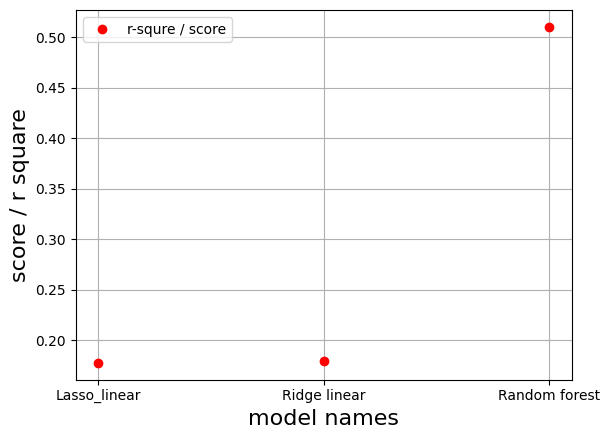

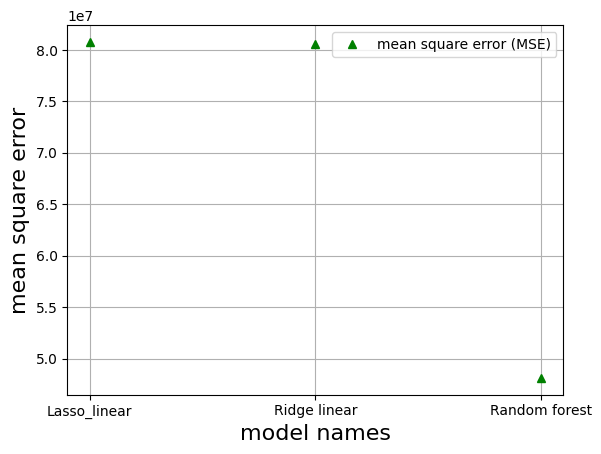

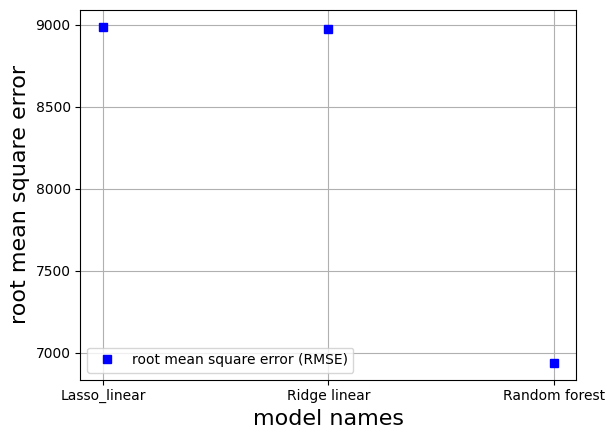

In [51]:
lst_score = [lasso_score, ridge_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

According to MSE,RMSE and R square, the Random Forest Regression has the best performance

## 4.3 Feature importance

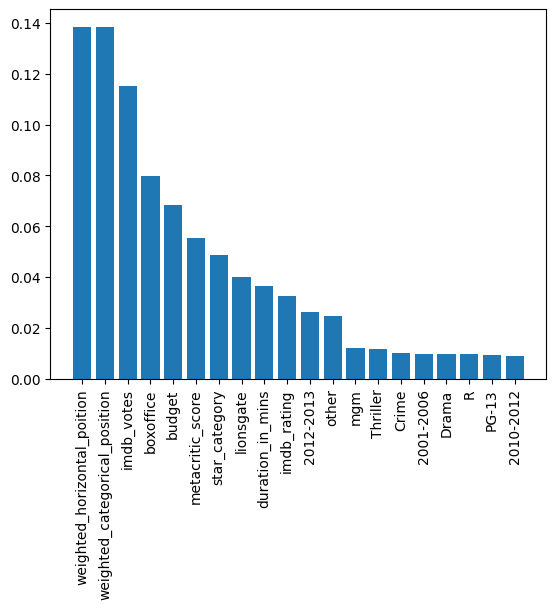

In [52]:
importances = rf.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()

According to the evaluation, Random Forest is the best performed model that has the highest R-squared and lowest Root mean squared error of 6937.243971200249. Based on the feature importance of random forest, horizontal position and categorical position was the most important feature to determine the value of view time per day. Therefore the company could use the position as main factor for pricing movie's adverticement. Or to improve movie push algorithm.
